In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("Data Science Intern - Task - Answer.xlsx", sheet_name = '1-Order data')
df.drop(['No filter', 'Contains T', 'CB', 'VB', 'FMB',2,3], axis = 1, inplace = True)
# save to hdf5 for fast loading
df.to_hdf('df.h5', key = 'df')

In [3]:
df = pd.read_hdf('df.h5', 'df')
df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted
0,402956,2017-W01,bundaberg,Direct Sales Agency,830,AU-FMB-4-4-0,201701
1,404468,2017-W01,adelaide-2,Direct Sales Agency,1061,AU-CB-3-2-0,201701
2,404519,2017-W01,gold-coast,Direct Sales Agency,830,AU-FMB-4-4-0,201701
3,405966,2017-W01,wollongong-1,Direct Sales Agency,1061,AU-CB-3-2-0,201701
4,406404,2017-W01,shepparton,App - Activation Organic,1061,AU-CB-3-2-0,201701


# Preprocessing

In [4]:
# Unique customer_sku
customer_sku = df['fk_customer'].unique()

In [5]:
# Get first week for each customer
first_order_week = {}

for i in range(len(customer_sku)):
    first_order_week[customer_sku[i]] = [df[df['fk_customer'] == customer_sku[i]].sort_values(by = 'Delivery week extracted').iloc[0,6]]

In [6]:
first_order_week

{402956: [201701],
 404468: [201701],
 404519: [201701],
 405966: [201701],
 406404: [201701],
 407714: [201701],
 409475: [201701],
 409495: [201701],
 410429: [201701],
 410694: [201701],
 413299: [201701],
 413615: [201701],
 413947: [201701],
 414300: [201701],
 415986: [201701],
 415987: [201701],
 416112: [201701],
 416289: [201701],
 416876: [201701],
 417417: [201701],
 417456: [201701],
 417791: [201701],
 418528: [201701],
 418603: [201701],
 418620: [201701],
 418651: [201701],
 420536: [201701],
 420880: [201701],
 420914: [201701],
 420952: [201701],
 421133: [201701],
 421220: [201701],
 421380: [201701],
 421381: [201701],
 421610: [201701],
 421797: [201701],
 421852: [201701],
 421969: [201701],
 421988: [201701],
 421997: [201701],
 422332: [201701],
 422351: [201701],
 422352: [201701],
 422556: [201701],
 422600: [201701],
 422612: [201701],
 423087: [201701],
 423383: [201701],
 423384: [201701],
 423712: [201701],
 424120: [201701],
 424232: [201701],
 424276: [20

In [7]:
# Calculate first 6 week, need to check week 52

for k in first_order_week.keys():
    for i in range(5):
        week_string = str(first_order_week[k][-1])
        if int(week_string[-2:]) < 52:
            first_order_week[k].append(first_order_week[k][-1]+1)
        else:
            first_order_week[k].append(first_order_week[k][-1]+100-51)

In [8]:
first_order_week

{402956: [201701, 201702, 201703, 201704, 201705, 201706],
 404468: [201701, 201702, 201703, 201704, 201705, 201706],
 404519: [201701, 201702, 201703, 201704, 201705, 201706],
 405966: [201701, 201702, 201703, 201704, 201705, 201706],
 406404: [201701, 201702, 201703, 201704, 201705, 201706],
 407714: [201701, 201702, 201703, 201704, 201705, 201706],
 409475: [201701, 201702, 201703, 201704, 201705, 201706],
 409495: [201701, 201702, 201703, 201704, 201705, 201706],
 410429: [201701, 201702, 201703, 201704, 201705, 201706],
 410694: [201701, 201702, 201703, 201704, 201705, 201706],
 413299: [201701, 201702, 201703, 201704, 201705, 201706],
 413615: [201701, 201702, 201703, 201704, 201705, 201706],
 413947: [201701, 201702, 201703, 201704, 201705, 201706],
 414300: [201701, 201702, 201703, 201704, 201705, 201706],
 415986: [201701, 201702, 201703, 201704, 201705, 201706],
 415987: [201701, 201702, 201703, 201704, 201705, 201706],
 416112: [201701, 201702, 201703, 201704, 201705, 201706

In [9]:
# Initialise empty DataFrame to store result
first_6_week = pd.DataFrame(index = customer_sku, columns = [i for i in range(6)])
first_6_week.fillna(False, inplace = True)
first_6_week

,0,1,2,3,4,5
402956,False,False,False,False,False,False
404468,False,False,False,False,False,False
404519,False,False,False,False,False,False
405966,False,False,False,False,False,False
406404,False,False,False,False,False,False
...,...,...,...,...,...,...
643803,False,False,False,False,False,False
697515,False,False,False,False,False,False
592395,False,False,False,False,False,False
440998,False,False,False,False,False,False


In [10]:
# Find corresponding record in order data
for k in first_order_week.keys():
    for d in range(6):
        try:
            week = df[(df['fk_customer'] == k) & (df['Delivery week extracted'] == first_order_week[k][d])].iloc[0,6]
            first_6_week.loc[k,d] = True
        except:
            continue

In [11]:
# Rename columns
first_6_week.columns = ['week ' + str(i) for i in range(1,7)]
first_6_week

,week 1,week 2,week 3,week 4,week 5,week 6
402956,True,True,False,True,True,True
404468,True,True,False,True,False,True
404519,True,True,False,False,False,False
405966,True,False,False,True,True,False
406404,True,False,True,False,False,False
...,...,...,...,...,...,...
643803,True,False,False,False,False,False
697515,True,False,False,False,False,False
592395,True,False,False,False,False,False
440998,True,False,True,False,False,False


In [12]:
# Append until 52 weeks
for k in first_order_week.keys():
    for i in range(46):
        week_string = str(first_order_week[k][-1])
        if int(week_string[-2:]) < 52:
            first_order_week[k].append(first_order_week[k][-1]+1)
        else:
            first_order_week[k].append(first_order_week[k][-1]+100-51)

In [13]:
first_52_week = first_6_week
first_52_week

,week 1,week 2,week 3,week 4,week 5,week 6
402956,True,True,False,True,True,True
404468,True,True,False,True,False,True
404519,True,True,False,False,False,False
405966,True,False,False,True,True,False
406404,True,False,True,False,False,False
...,...,...,...,...,...,...
643803,True,False,False,False,False,False
697515,True,False,False,False,False,False
592395,True,False,False,False,False,False
440998,True,False,True,False,False,False


In [14]:
# Find how many orders a customer placed in the first year
first_year_total = []

for i in first_52_week.index:
    total = len(df[(df['fk_customer'] == i) & df['Delivery week extracted'].isin(first_order_week[i])])
    first_year_total.append(total)

In [15]:
first_52_week['first_52week_total'] = first_year_total
first_52_week

,week 1,week 2,week 3,week 4,week 5,week 6,first_52week_total
402956,True,True,False,True,True,True,32
404468,True,True,False,True,False,True,9
404519,True,True,False,False,False,False,2
405966,True,False,False,True,True,False,3
406404,True,False,True,False,False,False,2
...,...,...,...,...,...,...,...
643803,True,False,False,False,False,False,1
697515,True,False,False,False,False,False,1
592395,True,False,False,False,False,False,1
440998,True,False,True,False,False,False,3


# Feature engineering
## Frequency: Total order customer place in the first six weeks

In [16]:
sum_6_week = []

for i in range(len(first_52_week)):
    sum_6_week.append(sum(first_52_week.iloc[i,:6]))

In [17]:
first_52_week['first_6week_sum'] = sum_6_week
first_52_week.reset_index(inplace = True)

In [18]:
# save to hdf5
first_52_week.to_hdf('first6week_target.h5','target')

In [19]:
first_52_week = pd.read_hdf('first6week_target.h5', 'target')
first_52_week

,index,week 1,week 2,week 3,week 4,week 5,week 6,first_52week_total,first_6week_sum
0,402956,True,True,False,True,True,True,32,5
1,404468,True,True,False,True,False,True,9,4
2,404519,True,True,False,False,False,False,2,2
3,405966,True,False,False,True,True,False,3,3
4,406404,True,False,True,False,False,False,2,2
...,...,...,...,...,...,...,...,...,...
9995,643803,True,False,False,False,False,False,1,1
9996,697515,True,False,False,False,False,False,1,1
9997,592395,True,False,False,False,False,False,1,1
9998,440998,True,False,True,False,False,False,3,2


In [20]:
# merge with order data
new_df = pd.merge(df, first_52_week, left_on = 'fk_customer', right_on = 'index')
new_df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,week 2,week 3,week 4,week 5,week 6,first_52week_total,first_6week_sum
0,402956,2017-W01,bundaberg,Direct Sales Agency,830,AU-FMB-4-4-0,201701,402956,True,True,False,True,True,True,32,5
1,402956,2017-W02,bundaberg,Direct Sales Agency,830,AU-FMB-4-4-0,201702,402956,True,True,False,True,True,True,32,5
2,402956,2017-W04,bundaberg,Direct Sales Agency,830,AU-FMB-4-4-0,201704,402956,True,True,False,True,True,True,32,5
3,402956,2017-W05,bundaberg,Direct Sales Agency,830,AU-FMB-4-4-0,201705,402956,True,True,False,True,True,True,32,5
4,402956,2017-W06,bundaberg,Direct Sales Agency,2911,AU-FMB-4-4-0,201706,402956,True,True,False,True,True,True,32,5


In [21]:
import datetime

# Transform delivery week to datetime obejct to allow for calculation
date = []
for i in new_df.index:
    r = datetime.datetime.strptime(new_df.loc[i, 'Delivery week'] + '-1', "%Y-W%W-%w")
    date.append(r)

new_df['date'] = date
new_df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,week 2,week 3,week 4,week 5,week 6,first_52week_total,first_6week_sum,date
0,402956,2017-W01,bundaberg,Direct Sales Agency,830,AU-FMB-4-4-0,201701,402956,True,True,False,True,True,True,32,5,2017-01-02
1,402956,2017-W02,bundaberg,Direct Sales Agency,830,AU-FMB-4-4-0,201702,402956,True,True,False,True,True,True,32,5,2017-01-09
2,402956,2017-W04,bundaberg,Direct Sales Agency,830,AU-FMB-4-4-0,201704,402956,True,True,False,True,True,True,32,5,2017-01-23
3,402956,2017-W05,bundaberg,Direct Sales Agency,830,AU-FMB-4-4-0,201705,402956,True,True,False,True,True,True,32,5,2017-01-30
4,402956,2017-W06,bundaberg,Direct Sales Agency,2911,AU-FMB-4-4-0,201706,402956,True,True,False,True,True,True,32,5,2017-02-06


In [22]:
# sort values for easier comparison
new_df = new_df.sort_values(['fk_customer', 'date'])
new_df

,fk_customer,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,week 2,week 3,week 4,week 5,week 6,first_52week_total,first_6week_sum,date
15813,10294,2017-W12,rockhampton,App - Activation Organic,2913,AU-CB-5-2-0,201712,10294,True,False,False,False,False,False,1,1,2017-03-20
5917,13823,2017-W06,shepparton,Daily Deals,2916,AU-CB-3-2-0,201706,13823,True,True,False,False,False,False,2,2,2017-02-06
5918,13823,2017-W07,shepparton,Daily Deals,2916,AU-CB-3-2-0,201707,13823,True,True,False,False,False,False,2,2,2017-02-13
22630,28456,2017-W17,adelaide-2,Gift Cards & Flyers,975,AU-VB-3-4-0,201717,28456,True,False,False,False,False,False,1,1,2017-04-24
67767,30261,2017-W48,sydney-3,Direct Sales Agency,2104,AU-CB-3-2-0,201748,30261,True,False,False,False,False,False,1,1,2017-11-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74608,763436,2018-W08,southern-highlands,Direct Sales Agency,2915,AU-CB-4-4-0,201808,763436,True,True,True,True,True,False,9,5,2018-02-19
74609,763436,2018-W09,southern-highlands,Direct Sales Agency,2915,AU-CB-4-4-0,201809,763436,True,True,True,True,True,False,9,5,2018-02-26
74610,763436,2018-W11,southern-highlands,Direct Sales Agency,2915,AU-CB-4-4-0,201811,763436,True,True,True,True,True,False,9,5,2018-03-12
74611,763466,2018-W01,cairns,Freebies,2100,AU-CB-5-2-0,201801,763466,True,False,False,False,False,False,2,1,2018-01-01


## Recency
### Seperate into frequent and infrequent group
Here, frequent group refers to customer whose 52 week total is greater than first 6 week total.

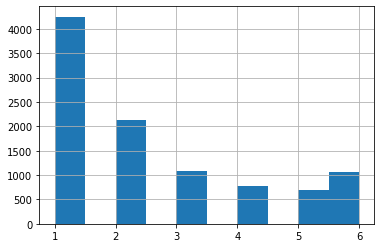

In [23]:
# all
temp = new_df.drop_duplicates(subset = 'fk_customer', keep = 'last')
temp['first_6week_sum'].hist()

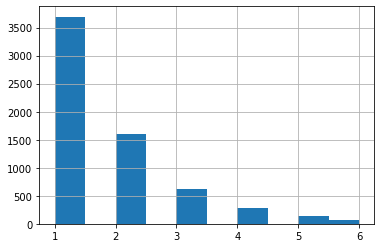

In [24]:
# infrequent
infrequent = temp[temp['first_6week_sum'] >= temp['first_52week_total']]
infrequent.first_6week_sum.hist()

In [25]:
infrequent_vc = infrequent.first_6week_sum.value_counts()
infrequent_vc

1    3694
2    1595
3     618
4     283
5     144
6      63
Name: first_6week_sum, dtype: int64

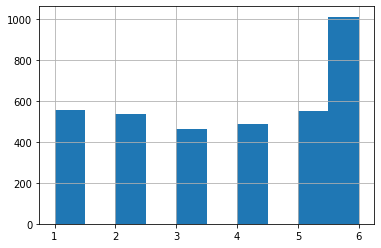

In [26]:
# frequent
frequent = temp[temp['first_6week_sum'] < temp['first_52week_total']]
frequent.first_6week_sum.hist()

In [27]:
frequent_vc = frequent.first_6week_sum.value_counts().sort_index()
frequent_vc

1     555
2     537
3     464
4     488
5     549
6    1010
Name: first_6week_sum, dtype: int64

In [28]:
# find threshold to seperate frequent and infrequent group
for i in range(7):
    print(i, np.sum([np.sum(infrequent_vc.values[:i]),np.sum(frequent_vc.values[i:])]))

0 3603
1 6742
2 7800
3 7954
4 7749
5 7344
6 6397


Choosing a threshold of 3 result in the least amount of misclassification between frequent and infrequent customer

In [29]:
frequent_df = new_df[new_df['first_6week_sum'] > 3]
frequent_df.head(10)

,fk_customer,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,week 2,week 3,week 4,week 5,week 6,first_52week_total,first_6week_sum,date
66149,35947,2017-W47,darwin-2,Blogger Outreach,2094,AU-CB-5-4-0,201747,35947,True,True,True,True,True,False,6,5,2017-11-20
66150,35947,2017-W48,darwin-2,Blogger Outreach,2098,AU-CB-3-4-0,201748,35947,True,True,True,True,True,False,6,5,2017-11-27
66151,35947,2017-W49,darwin-2,Blogger Outreach,2098,AU-CB-3-4-0,201749,35947,True,True,True,True,True,False,6,5,2017-12-04
66152,35947,2017-W50,darwin-2,Blogger Outreach,2104,AU-CB-3-2-0,201750,35947,True,True,True,True,True,False,6,5,2017-12-11
66153,35947,2017-W51,darwin-2,Blogger Outreach,2104,AU-CB-3-2-0,201751,35947,True,True,True,True,True,False,6,5,2017-12-18
66154,35947,2018-W01,darwin-2,Blogger Outreach,2104,AU-CB-3-2-0,201801,35947,True,True,True,True,True,False,6,5,2018-01-01
19223,40980,2017-W14,bendigo-1,TV,961,AU-CB-5-2-0,201714,40980,True,True,True,True,True,True,8,6,2017-04-03
19224,40980,2017-W15,bendigo-1,TV,961,AU-CB-5-2-0,201715,40980,True,True,True,True,True,True,8,6,2017-04-10
19225,40980,2017-W16,bendigo-1,TV,961,AU-CB-5-2-0,201716,40980,True,True,True,True,True,True,8,6,2017-04-17
19226,40980,2017-W17,bendigo-1,TV,961,AU-CB-5-2-0,201717,40980,True,True,True,True,True,True,8,6,2017-04-24


## Order lag days

In [30]:
frequent_df['PrevDate'] = frequent_df.groupby('fk_customer')['date'].shift(1)
frequent_df['T2Date'] = frequent_df.groupby('fk_customer')['date'].shift(2)
frequent_df['T3Date'] = frequent_df.groupby('fk_customer')['date'].shift(3)
# get number of days
frequent_df['PrevDiff'] = (frequent_df['date'] - frequent_df['PrevDate']).dt.days
frequent_df['T2DayDiff'] = (frequent_df['date'] - frequent_df['T2Date']).dt.days
frequent_df['T3DayDiff'] = (frequent_df['date'] - frequent_df['T3Date']).dt.days

C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [31]:
frequent_df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,week 2,...,week 6,first_52week_total,first_6week_sum,date,PrevDate,T2Date,T3Date,PrevDiff,T2DayDiff,T3DayDiff
66149,35947,2017-W47,darwin-2,Blogger Outreach,2094,AU-CB-5-4-0,201747,35947,True,True,...,False,6,5,2017-11-20,NaT,NaT,NaT,NaN,NaN,NaN
66150,35947,2017-W48,darwin-2,Blogger Outreach,2098,AU-CB-3-4-0,201748,35947,True,True,...,False,6,5,2017-11-27,2017-11-20,NaT,NaT,7.0,NaN,NaN
66151,35947,2017-W49,darwin-2,Blogger Outreach,2098,AU-CB-3-4-0,201749,35947,True,True,...,False,6,5,2017-12-04,2017-11-27,2017-11-20,NaT,7.0,14.0,NaN
66152,35947,2017-W50,darwin-2,Blogger Outreach,2104,AU-CB-3-2-0,201750,35947,True,True,...,False,6,5,2017-12-11,2017-12-04,2017-11-27,2017-11-20,7.0,14.0,21.0
66153,35947,2017-W51,darwin-2,Blogger Outreach,2104,AU-CB-3-2-0,201751,35947,True,True,...,False,6,5,2017-12-18,2017-12-11,2017-12-04,2017-11-27,7.0,14.0,21.0


In [32]:
infrequent_df = new_df[~new_df['fk_customer'].isin(frequent_df.fk_customer)]
infrequent_df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,week 2,week 3,week 4,week 5,week 6,first_52week_total,first_6week_sum,date
15813,10294,2017-W12,rockhampton,App - Activation Organic,2913,AU-CB-5-2-0,201712,10294,True,False,False,False,False,False,1,1,2017-03-20
5917,13823,2017-W06,shepparton,Daily Deals,2916,AU-CB-3-2-0,201706,13823,True,True,False,False,False,False,2,2,2017-02-06
5918,13823,2017-W07,shepparton,Daily Deals,2916,AU-CB-3-2-0,201707,13823,True,True,False,False,False,False,2,2,2017-02-13
22630,28456,2017-W17,adelaide-2,Gift Cards & Flyers,975,AU-VB-3-4-0,201717,28456,True,False,False,False,False,False,1,1,2017-04-24
67767,30261,2017-W48,sydney-3,Direct Sales Agency,2104,AU-CB-3-2-0,201748,30261,True,False,False,False,False,False,1,1,2017-11-27


## Mean and std dev of prev order day

In [33]:
# calculate mean and std dev of prev order day
prev_mean = []
prev_std = []

for i in frequent_df.index:
    sub = frequent_df[(frequent_df['fk_customer'] == frequent_df.loc[i,'fk_customer']) &(frequent_df['date'] <= frequent_df.loc[i,'date'])]
    mean = np.nanmean(sub['PrevDiff'])
    std = np.nanstd(sub['PrevDiff'])
    prev_mean.append(mean)
    prev_std.append(std)

C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
C:\Users\joete\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [34]:
frequent_df['PrevMean'] = prev_mean
frequent_df['PrevStd'] = prev_std
frequent_df.head()

C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fk_customer,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,week 2,...,first_6week_sum,date,PrevDate,T2Date,T3Date,PrevDiff,T2DayDiff,T3DayDiff,PrevMean,PrevStd
66149,35947,2017-W47,darwin-2,Blogger Outreach,2094,AU-CB-5-4-0,201747,35947,True,True,...,5,2017-11-20,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN
66150,35947,2017-W48,darwin-2,Blogger Outreach,2098,AU-CB-3-4-0,201748,35947,True,True,...,5,2017-11-27,2017-11-20,NaT,NaT,7.0,NaN,NaN,7.0,0.0
66151,35947,2017-W49,darwin-2,Blogger Outreach,2098,AU-CB-3-4-0,201749,35947,True,True,...,5,2017-12-04,2017-11-27,2017-11-20,NaT,7.0,14.0,NaN,7.0,0.0
66152,35947,2017-W50,darwin-2,Blogger Outreach,2104,AU-CB-3-2-0,201750,35947,True,True,...,5,2017-12-11,2017-12-04,2017-11-27,2017-11-20,7.0,14.0,21.0,7.0,0.0
66153,35947,2017-W51,darwin-2,Blogger Outreach,2104,AU-CB-3-2-0,201751,35947,True,True,...,5,2017-12-18,2017-12-11,2017-12-04,2017-11-27,7.0,14.0,21.0,7.0,0.0


## Extract product sku components

In [35]:
sku_comp = list(frequent_df['Product sku?'].str.split('-'))
sku_comp

[['AU', 'CB', '5', '4', '0'],
 ['AU', 'CB', '3', '4', '0'],
 ['AU', 'CB', '3', '4', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '5', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'CB', '3', '2', '0'],
 ['AU', 'C

In [36]:
box_type = []
recipe_no = []
people_no = []

for i in sku_comp:
    box_type.append(i[1])
    recipe_no.append(i[2])
    people_no.append(i[3])

In [37]:
frequent_df['box_type'] = box_type
frequent_df['recipe_no'] = recipe_no
frequent_df['people_no'] = people_no
frequent_df.head()

C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,fk_customer,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,week 2,...,T2Date,T3Date,PrevDiff,T2DayDiff,T3DayDiff,PrevMean,PrevStd,box_type,recipe_no,people_no
66149,35947,2017-W47,darwin-2,Blogger Outreach,2094,AU-CB-5-4-0,201747,35947,True,True,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,CB,5,4
66150,35947,2017-W48,darwin-2,Blogger Outreach,2098,AU-CB-3-4-0,201748,35947,True,True,...,NaT,NaT,7.0,NaN,NaN,7.0,0.0,CB,3,4
66151,35947,2017-W49,darwin-2,Blogger Outreach,2098,AU-CB-3-4-0,201749,35947,True,True,...,2017-11-20,NaT,7.0,14.0,NaN,7.0,0.0,CB,3,4
66152,35947,2017-W50,darwin-2,Blogger Outreach,2104,AU-CB-3-2-0,201750,35947,True,True,...,2017-11-27,2017-11-20,7.0,14.0,21.0,7.0,0.0,CB,3,2
66153,35947,2017-W51,darwin-2,Blogger Outreach,2104,AU-CB-3-2-0,201751,35947,True,True,...,2017-12-04,2017-11-27,7.0,14.0,21.0,7.0,0.0,CB,3,2


## Select transactions for the first 6 weeks

In [38]:
# get cutoff point i.e. 6th week
sixth_week = {}
for k,v in first_order_week.items():
    sixth_week[k] = v[5]
sixth_week

{402956: 201706,
 404468: 201706,
 404519: 201706,
 405966: 201706,
 406404: 201706,
 407714: 201706,
 409475: 201706,
 409495: 201706,
 410429: 201706,
 410694: 201706,
 413299: 201706,
 413615: 201706,
 413947: 201706,
 414300: 201706,
 415986: 201706,
 415987: 201706,
 416112: 201706,
 416289: 201706,
 416876: 201706,
 417417: 201706,
 417456: 201706,
 417791: 201706,
 418528: 201706,
 418603: 201706,
 418620: 201706,
 418651: 201706,
 420536: 201706,
 420880: 201706,
 420914: 201706,
 420952: 201706,
 421133: 201706,
 421220: 201706,
 421380: 201706,
 421381: 201706,
 421610: 201706,
 421797: 201706,
 421852: 201706,
 421969: 201706,
 421988: 201706,
 421997: 201706,
 422332: 201706,
 422351: 201706,
 422352: 201706,
 422556: 201706,
 422600: 201706,
 422612: 201706,
 423087: 201706,
 423383: 201706,
 423384: 201706,
 423712: 201706,
 424120: 201706,
 424232: 201706,
 424276: 201706,
 424485: 201706,
 424647: 201706,
 424693: 201706,
 424719: 201706,
 424732: 201706,
 424760: 20170

In [39]:
# unique customer id
frequent_customer_unique = list(frequent_df.fk_customer.unique())
frequent_customer_unique

[35947,
 40980,
 43983,
 95346,
 96748,
 115106,
 126369,
 163175,
 179804,
 186610,
 193723,
 207055,
 211727,
 219404,
 220442,
 234954,
 245729,
 249970,
 253517,
 261851,
 263517,
 270531,
 286543,
 296748,
 297498,
 299677,
 301417,
 309166,
 311931,
 317421,
 327456,
 329376,
 336998,
 337713,
 340122,
 343255,
 344946,
 345937,
 347602,
 351353,
 364099,
 365065,
 369648,
 375878,
 376584,
 377031,
 381160,
 382147,
 389128,
 389627,
 400826,
 402956,
 403915,
 404468,
 404994,
 409475,
 410442,
 411237,
 411751,
 412043,
 412875,
 413191,
 413706,
 414300,
 414945,
 415025,
 415851,
 416289,
 417417,
 417456,
 417791,
 418016,
 418421,
 418528,
 420028,
 420392,
 420504,
 420721,
 420952,
 421099,
 421317,
 421797,
 422057,
 422398,
 422802,
 423027,
 423251,
 423316,
 423441,
 424232,
 424463,
 424647,
 424824,
 424940,
 425044,
 425345,
 425348,
 425682,
 425714,
 425848,
 425877,
 425919,
 426025,
 426073,
 426116,
 426187,
 426240,
 426395,
 426429,
 426433,
 426681,
 42673

In [40]:
# get all records that are <= cutoff point
sixth_week_index = []
for k,v in sixth_week.items():
    if k in frequent_customer_unique:
        index = frequent_df[(frequent_df['fk_customer'] == k) & (frequent_df['Delivery week extracted'] <= v)].index.values
        for i in index:
            sixth_week_index.append(i)

In [41]:
frequent_df = frequent_df.loc[sixth_week_index,:]
frequent_df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,week 2,...,T2Date,T3Date,PrevDiff,T2DayDiff,T3DayDiff,PrevMean,PrevStd,box_type,recipe_no,people_no
0,402956,2017-W01,bundaberg,Direct Sales Agency,830,AU-FMB-4-4-0,201701,402956,True,True,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,FMB,4,4
1,402956,2017-W02,bundaberg,Direct Sales Agency,830,AU-FMB-4-4-0,201702,402956,True,True,...,NaT,NaT,7.0,NaN,NaN,7.000000,0.000000,FMB,4,4
2,402956,2017-W04,bundaberg,Direct Sales Agency,830,AU-FMB-4-4-0,201704,402956,True,True,...,2017-01-02,NaT,14.0,21.0,NaN,10.500000,3.500000,FMB,4,4
3,402956,2017-W05,bundaberg,Direct Sales Agency,830,AU-FMB-4-4-0,201705,402956,True,True,...,2017-01-09,2017-01-02,7.0,21.0,28.0,9.333333,3.299832,FMB,4,4
4,402956,2017-W06,bundaberg,Direct Sales Agency,2911,AU-FMB-4-4-0,201706,402956,True,True,...,2017-01-23,2017-01-09,7.0,14.0,28.0,8.750000,3.031089,FMB,4,4


## Arrange count of different types of boxes in to matrix

In [42]:
frequent_df.people_no.value_counts()

2    9499
4    3528
Name: people_no, dtype: int64

In [43]:
frequent_df.recipe_no.value_counts()

3    8116
4    2584
5    2327
Name: recipe_no, dtype: int64

In [44]:
customer = frequent_df['fk_customer'].unique()
product_sku_count = pd.DataFrame(index = customer)
product_sku_count['CB'] = 0
product_sku_count['VB'] = 0
product_sku_count['FMB'] = 0
product_sku_count['people_count2'] = 0
product_sku_count['people_count4'] = 0
product_sku_count['recipe_no3'] = 0
product_sku_count['recipe_no4'] = 0
product_sku_count['recipe_no5'] = 0
product_sku_count.head()

,CB,VB,FMB,people_count2,people_count4,recipe_no3,recipe_no4,recipe_no5
402956,0,0,0,0,0,0,0,0
404468,0,0,0,0,0,0,0,0
409475,0,0,0,0,0,0,0,0
414300,0,0,0,0,0,0,0,0
416289,0,0,0,0,0,0,0,0


In [45]:
# box type for each customer
box_groupby = frequent_df.groupby(['fk_customer','box_type']).count().reset_index()
box_groupby.head()

,fk_customer,box_type,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,...,PrevDate,T2Date,T3Date,PrevDiff,T2DayDiff,T3DayDiff,PrevMean,PrevStd,recipe_no,people_no
0,35947,CB,5,5,5,5,5,5,5,5,...,4,3,2,4,3,2,4,4,5,5
1,40980,CB,6,6,6,6,6,6,6,6,...,5,4,3,5,4,3,5,5,6,6
2,43983,CB,6,6,6,6,6,6,6,6,...,5,4,3,5,4,3,5,5,6,6
3,95346,CB,6,6,6,6,6,6,6,6,...,5,4,3,5,4,3,5,5,6,6
4,96748,CB,4,4,4,4,4,4,4,4,...,3,2,1,3,2,1,3,3,4,4


In [46]:
for i in range(len(box_groupby)):
    product_sku_count.loc[box_groupby.loc[i,'fk_customer'], box_groupby.loc[i,'box_type']] = box_groupby.loc[i,'fk_product']

In [47]:
# recipe count for each customer
recipe_no_groupby = frequent_df.groupby(['fk_customer', 'recipe_no']).count().reset_index()
recipe_no_groupby

,fk_customer,recipe_no,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,...,PrevDate,T2Date,T3Date,PrevDiff,T2DayDiff,T3DayDiff,PrevMean,PrevStd,box_type,people_no
0,35947,3,4,4,4,4,4,4,4,4,...,4,3,2,4,3,2,4,4,4,4
1,35947,5,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
2,40980,5,6,6,6,6,6,6,6,6,...,5,4,3,5,4,3,5,5,6,6
3,43983,5,6,6,6,6,6,6,6,6,...,5,4,3,5,4,3,5,5,6,6
4,95346,3,6,6,6,6,6,6,6,6,...,5,4,3,5,4,3,5,5,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,761154,5,2,2,2,2,2,2,2,2,...,1,0,0,1,0,0,1,1,2,2
2961,761327,3,4,4,4,4,4,4,4,4,...,3,2,1,3,2,1,3,3,4,4
2962,761612,3,4,4,4,4,4,4,4,4,...,3,2,1,3,2,1,3,3,4,4
2963,761948,4,6,6,6,6,6,6,6,6,...,5,4,3,5,4,3,5,5,6,6


In [48]:
for i in range(len(recipe_no_groupby)):
    if recipe_no_groupby.loc[i, 'recipe_no'] == '3':
        product_sku_count.loc[recipe_no_groupby.loc[i,'fk_customer'], 'recipe_no3'] = recipe_no_groupby.loc[i,'fk_product']
    elif recipe_no_groupby.loc[i, 'recipe_no'] == '4':
        product_sku_count.loc[recipe_no_groupby.loc[i,'fk_customer'], 'recipe_no4'] = recipe_no_groupby.loc[i,'fk_product']
    elif recipe_no_groupby.loc[i, 'recipe_no'] == '5':
        product_sku_count.loc[recipe_no_groupby.loc[i,'fk_customer'], 'recipe_no5'] = recipe_no_groupby.loc[i,'fk_product']

In [49]:
# recipe_people count for each customer
people_no_groupby = frequent_df.groupby(['fk_customer', 'people_no']).count().reset_index()
people_no_groupby

,fk_customer,people_no,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,...,PrevDate,T2Date,T3Date,PrevDiff,T2DayDiff,T3DayDiff,PrevMean,PrevStd,box_type,recipe_no
0,35947,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,35947,4,3,3,3,3,3,3,3,3,...,2,1,0,2,1,0,2,2,3,3
2,40980,2,6,6,6,6,6,6,6,6,...,5,4,3,5,4,3,5,5,6,6
3,43983,2,6,6,6,6,6,6,6,6,...,5,4,3,5,4,3,5,5,6,6
4,95346,2,6,6,6,6,6,6,6,6,...,5,4,3,5,4,3,5,5,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,761154,2,4,4,4,4,4,4,4,4,...,3,2,1,3,2,1,3,3,4,4
2730,761327,2,4,4,4,4,4,4,4,4,...,3,2,1,3,2,1,3,3,4,4
2731,761612,2,4,4,4,4,4,4,4,4,...,3,2,1,3,2,1,3,3,4,4
2732,761948,4,6,6,6,6,6,6,6,6,...,5,4,3,5,4,3,5,5,6,6


In [50]:
for i in range(len(people_no_groupby)): 
    if people_no_groupby.loc[i, 'people_no'] == '2':
        product_sku_count.loc[people_no_groupby.loc[i,'fk_customer'], 'people_count2'] = people_no_groupby.loc[i,'fk_product']
    elif people_no_groupby.loc[i, 'people_no'] == '4':
        product_sku_count.loc[people_no_groupby.loc[i,'fk_customer'], 'people_count4'] = people_no_groupby.loc[i,'fk_product']

In [51]:
product_sku_count = product_sku_count.reset_index()
product_sku_count.head()

,index,CB,VB,FMB,people_count2,people_count4,recipe_no3,recipe_no4,recipe_no5
0,402956,0,0,5,0,5,0,5,0
1,404468,4,0,0,4,0,4,0,0
2,409475,0,0,6,0,6,0,6,0
3,414300,0,5,0,5,0,5,0,0
4,416289,0,0,5,0,5,0,5,0


In [52]:
# merge product sku df with frequent df and only keep the last transaction in the first 6 weeks
frequent_df = pd.merge(frequent_df, product_sku_count, left_on = 'fk_customer', right_on = 'index').drop_duplicates(subset = 'fk_customer', keep = 'last')

In [53]:
frequent_df = frequent_df[['Region?', 'Channel?','fk_product','first_6week_sum','PrevDiff','T2DayDiff', 'T3DayDiff', 
             'PrevMean', 'PrevStd','CB', 'VB', 'FMB', 'people_count2',
       'people_count4', 'recipe_no3', 'recipe_no4', 'recipe_no5','first_52week_total']]
frequent_df

,Region?,Channel?,fk_product,first_6week_sum,PrevDiff,T2DayDiff,T3DayDiff,PrevMean,PrevStd,CB,VB,FMB,people_count2,people_count4,recipe_no3,recipe_no4,recipe_no5,first_52week_total
4,bundaberg,Direct Sales Agency,2911,5,7.0,14.0,28.0,8.750000,3.031089,0,0,5,0,5,0,5,0,32
8,adelaide-2,Direct Sales Agency,2916,4,14.0,28.0,35.0,11.666667,3.299832,4,0,0,4,0,4,0,0,9
14,shepparton,Direct Sales In-house,2911,6,7.0,14.0,21.0,7.000000,0.000000,0,0,6,0,6,0,6,0,9
19,hervey-bay,Direct Sales In-house,742,5,7.0,14.0,21.0,7.000000,0.000000,0,5,0,5,0,5,0,0,5
24,central-west-nsw-1,Direct Sales Agency,2911,5,7.0,14.0,21.0,8.750000,3.031089,0,0,5,0,5,0,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13005,melbourne-6,SEM-Brand,2908,4,7.0,21.0,28.0,9.333333,3.299832,0,4,0,4,0,4,0,0,16
13011,melbourne-5,Daily Deals,2911,6,7.0,14.0,21.0,7.000000,0.000000,0,0,6,0,6,0,6,0,19
13016,southern-highlands,Direct Sales Agency,2915,5,7.0,14.0,21.0,7.000000,0.000000,5,0,0,0,5,0,5,0,9
13021,adelaide-2,SEO,2916,5,14.0,21.0,28.0,8.750000,3.031089,5,0,0,5,0,5,0,0,23


## Target encoding for categorical features using expanding mean for regularisation
### Region

In [54]:
cumsum = frequent_df.groupby('Region?')['first_52week_total'].cumsum() - frequent_df['first_52week_total']
cumcnt = frequent_df.groupby('Region?')['first_52week_total'].cumcount()
frequent_df['region_target_enc'] = cumsum/cumcnt

In [55]:
global_mean = frequent_df['first_52week_total'].mean()
frequent_df['region_target_enc'].fillna(global_mean, inplace = True)

### Channel

In [56]:
cumsum = frequent_df.groupby('Channel?')['first_52week_total'].cumsum() - frequent_df['first_52week_total']
cumcnt = frequent_df.groupby('Channel?')['first_52week_total'].cumcount()
frequent_df['channel_target_enc'] = cumsum/cumcnt

In [57]:
frequent_df['channel_target_enc'].fillna(global_mean, inplace = True)

### fk_product

In [58]:
cumsum = frequent_df.groupby('fk_product')['first_52week_total'].cumsum()- frequent_df['first_52week_total']
cumcnt = frequent_df.groupby('fk_product')['first_52week_total'].cumcount()
frequent_df['product_target_enc'] = cumsum/cumcnt

In [59]:
frequent_df['product_target_enc'].fillna(global_mean, inplace = True)

### Rearrage columns and save to hdf5

In [60]:
# rearrange columns
cols = list(frequent_df.columns.values)
cols.pop(cols.index('first_52week_total'))
frequent_df = frequent_df[cols+['first_52week_total']]

frequent_df.to_hdf('train_features.h5','train')

In [61]:
infrequent_df = infrequent_df.drop_duplicates(subset = 'fk_customer', keep = 'last')
infrequent_df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,week 2,week 3,week 4,week 5,week 6,first_52week_total,first_6week_sum,date
15813,10294,2017-W12,rockhampton,App - Activation Organic,2913,AU-CB-5-2-0,201712,10294,True,False,False,False,False,False,1,1,2017-03-20
5918,13823,2017-W07,shepparton,Daily Deals,2916,AU-CB-3-2-0,201707,13823,True,True,False,False,False,False,2,2,2017-02-13
22630,28456,2017-W17,adelaide-2,Gift Cards & Flyers,975,AU-VB-3-4-0,201717,28456,True,False,False,False,False,False,1,1,2017-04-24
67767,30261,2017-W48,sydney-3,Direct Sales Agency,2104,AU-CB-3-2-0,201748,30261,True,False,False,False,False,False,1,1,2017-11-27
17281,34519,2017-W14,darwin,Freebies,884,AU-CB-3-4-0,201714,34519,True,True,False,False,False,False,2,2,2017-04-03


In [62]:
infrequent_df.to_hdf('infrequent_train.h5', 'infrequent_train')

# Modelling

In [63]:
train = pd.read_hdf('train_features.h5','train')
train.head()

,Region?,Channel?,fk_product,first_6week_sum,PrevDiff,T2DayDiff,T3DayDiff,PrevMean,PrevStd,CB,...,FMB,people_count2,people_count4,recipe_no3,recipe_no4,recipe_no5,region_target_enc,channel_target_enc,product_target_enc,first_52week_total
4,bundaberg,Direct Sales Agency,2911,5,7.0,14.0,28.0,8.750000,3.031089,0,...,5,0,5,0,5,0,16.791486,16.791486,16.791486,32
8,adelaide-2,Direct Sales Agency,2916,4,14.0,28.0,35.0,11.666667,3.299832,4,...,0,4,0,4,0,0,16.791486,32.000000,16.791486,9
14,shepparton,Direct Sales In-house,2911,6,7.0,14.0,21.0,7.000000,0.000000,0,...,6,0,6,0,6,0,16.791486,16.791486,32.000000,9
19,hervey-bay,Direct Sales In-house,742,5,7.0,14.0,21.0,7.000000,0.000000,0,...,0,5,0,5,0,0,16.791486,9.000000,16.791486,5
24,central-west-nsw-1,Direct Sales Agency,2911,5,7.0,14.0,21.0,8.750000,3.031089,0,...,5,0,5,0,5,0,16.791486,20.500000,20.500000,13


In [64]:
train = train.iloc[:,3:]
train.head()

,first_6week_sum,PrevDiff,T2DayDiff,T3DayDiff,PrevMean,PrevStd,CB,VB,FMB,people_count2,people_count4,recipe_no3,recipe_no4,recipe_no5,region_target_enc,channel_target_enc,product_target_enc,first_52week_total
4,5,7.0,14.0,28.0,8.750000,3.031089,0,0,5,0,5,0,5,0,16.791486,16.791486,16.791486,32
8,4,14.0,28.0,35.0,11.666667,3.299832,4,0,0,4,0,4,0,0,16.791486,32.000000,16.791486,9
14,6,7.0,14.0,21.0,7.000000,0.000000,0,0,6,0,6,0,6,0,16.791486,16.791486,32.000000,9
19,5,7.0,14.0,21.0,7.000000,0.000000,0,5,0,5,0,5,0,0,16.791486,9.000000,16.791486,5
24,5,7.0,14.0,21.0,8.750000,3.031089,0,0,5,0,5,0,5,0,16.791486,20.500000,20.500000,13


In [65]:
# train test split
from sklearn.model_selection import train_test_split

X = train.iloc[:,:-1]
y = train.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# 0. Baseline
Naive model using the first 6 week total as prediction for 52 week total

In [66]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, X_test['first_6week_sum'])

11.864173228346457

# Base model
## 1. Gradient boosted tree

In [67]:
import xgboost as xgb

params = {
    'min_child_weight': [1, 5, 10, 20,40,100,200],
    'colsample_bytree' : [0.3,0.4,0.5,0.6,0.7],
    'subsample': [0.4,0.6,0.8,1],
    'learning_rate' : [0.1,0.2,0.4],
    'n_estimators':[6,7,8,9,10],
    'max_depth':[5,6,7,8]
}

In [68]:
from sklearn.model_selection import GridSearchCV
model = xgb.XGBRegressor()
reg = GridSearchCV(model, params, scoring = 'neg_mean_absolute_error', n_jobs = -1, verbose = 10)
reg.fit(X_train, y_train)

Fitting 5 folds for each of 8400 candidates, totalling 42000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1974s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0580s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1680s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed: 

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'learning_rate': [0.1, 0.2, 0.4],
                         'max_depth': [5

In [69]:
xg_reg = reg.best_estimator_
xg_reg.fit(X_train,y_train)
xg_preds = xg_reg.predict(X_test)
# validation error
mean_absolute_error(y_test, xg_preds)

9.230435369521613

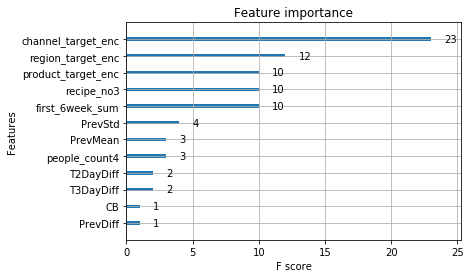

In [70]:
from xgboost import plot_importance
plot_importance(xg_reg)

## 2. SVM

Stepwise forward features selection with corss validation

In [71]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from copy import deepcopy

def stepwise_forward_cv(model, X_train, y_train):
    
    features_pool = list(X_train.columns)
    cur_features = []
    global_score = float('inf')
    
    # pick one feature at a time and use MAE as evaluation metric
    for i in range(len(features_pool)-1,-1,-1):
        flag = False
        for j in range(len(features_pool)-1,-1,-1):
            cur_features_temp = deepcopy(cur_features)
            cur_features_temp.append(features_pool[j])
            train_temp = X_train[cur_features_temp]
            scores = -np.mean(cross_val_score(model, train_temp, y_train, cv =5, scoring = 'neg_mean_absolute_error'))

            if scores < global_score:
                global_score = scores
                index = j
                flag = True

        if flag == False:
            break

        cur_features.append(features_pool[j])
        features_pool.pop(j)
    
    return cur_features

In [72]:
svm_reg = svm.SVR(kernel = 'linear')
svm_features_sub = stepwise_forward_cv(svm_reg, X_train, y_train)
svm_features_sub

['first_6week_sum', 'PrevDiff']

In [73]:
svm_reg.fit(X_train[svm_features_sub], y_train)
svm_preds = svm_reg.predict(X_test[svm_features_sub])
mean_absolute_error(y_test, svm_preds)

9.202165067954041

## 3. KNN

In [74]:
from sklearn.preprocessing import MinMaxScaler

X_train_MinMaxScaled = pd.DataFrame(MinMaxScaler().fit_transform(X_train))
X_train_MinMaxScaled.columns = X_train.columns

X_test_MinMaxScaled = pd.DataFrame(MinMaxScaler().fit_transform(X_test))
X_test_MinMaxScaled.columns = X_test.columns

In [75]:
X_train_MinMaxScaled.head()

,first_6week_sum,PrevDiff,T2DayDiff,T3DayDiff,PrevMean,PrevStd,CB,VB,FMB,people_count2,people_count4,recipe_no3,recipe_no4,recipe_no5,region_target_enc,channel_target_enc,product_target_enc
0,0.0,0.333333,0.333333,0.50,0.454545,0.00000,0.363636,0.0,0.0,0.000000,0.363636,0.000000,0.000000,0.363636,0.267614,0.282409,0.386628
1,0.0,0.333333,0.333333,0.50,0.454545,0.00000,0.363636,0.0,0.0,0.363636,0.000000,0.000000,0.571429,0.000000,0.353788,0.331421,0.302326
2,0.5,0.333333,0.333333,0.75,0.659091,0.39736,0.454545,0.0,0.0,0.454545,0.000000,0.454545,0.000000,0.000000,0.242424,0.288248,0.352847
3,1.0,0.333333,0.333333,0.50,0.454545,0.00000,0.545455,0.0,0.0,0.545455,0.000000,0.545455,0.000000,0.000000,0.272727,0.206397,0.255814
4,1.0,0.333333,0.333333,0.50,0.454545,0.00000,0.545455,0.0,0.0,0.545455,0.000000,0.000000,0.000000,0.545455,0.273815,0.352273,0.388704


In [76]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_features_sub = stepwise_forward_cv(knn_reg, X_train_MinMaxScaled, y_train)
knn_features_sub

['first_6week_sum']

In [77]:
params = {'n_neighbors': [i for i in range(1,20)]}
knn_features = np.array(X_train_MinMaxScaled['first_6week_sum']).reshape(-1,1)

model = KNeighborsRegressor()
reg = GridSearchCV(model, params, scoring = 'neg_mean_absolute_error', n_jobs = -1, verbose = 10)
reg.fit(knn_features, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0800s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0586s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  74 out of  95 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  84 out of  95 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=10)

In [78]:
knn_reg = reg.best_estimator_

knn_reg.fit(X_train_MinMaxScaled[knn_features_sub], y_train)
knn_preds = knn_reg.predict(X_test_MinMaxScaled[knn_features_sub])
mean_absolute_error(y_test, knn_preds)

9.853520148216766

## 4. Neural network

In [79]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [80]:
nn_reg = Sequential()
nn_reg.add(Dense(17, input_dim=17, activation='relu'))
nn_reg.add(Dense(32,activation ='relu'))
nn_reg.add(Dropout(0.2))
nn_reg.add(Dense(1))
# Compile model
nn_reg.compile(loss='mean_absolute_error', optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='min', patience = 10,verbose=1)

nn_reg.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 8, callbacks=[es])

Epoch 1/100
254/254 [==============================] - 1s 2ms/step - loss: 12.5333 - val_loss: 10.1205
Epoch 2/100
254/254 [==============================] - 0s 621us/step - loss: 10.1415 - val_loss: 9.9291
Epoch 3/100
254/254 [==============================] - 0s 601us/step - loss: 10.2731 - val_loss: 9.8696
Epoch 4/100
254/254 [==============================] - 0s 609us/step - loss: 9.7172 - val_loss: 9.8097
Epoch 5/100
254/254 [==============================] - 0s 613us/step - loss: 9.6544 - val_loss: 9.7760
Epoch 6/100
254/254 [==============================] - 0s 609us/step - loss: 9.9660 - val_loss: 9.7018
Epoch 7/100
254/254 [==============================] - 0s 601us/step - loss: 9.3970 - val_loss: 9.6757
Epoch 8/100
254/254 [==============================] - 0s 617us/step - loss: 9.7731 - val_loss: 9.6432
Epoch 9/100
254/254 [==============================] - 0s 609us/step - loss: 10.1648 - val_loss: 9.5577
Epoch 10/100
254/254 [==============================] - 0s 613us/step 

## Stacking
### Meta features

In [81]:
mf1 = xg_reg.predict(X_train)
mf2 = svm_reg.predict(X_train[svm_features_sub])
mf3 = knn_reg.predict(X_train_MinMaxScaled[knn_features_sub])
mf4 = nn_reg.predict(X_train).reshape(1,-1)[0]

X_train_meta = pd.DataFrame({'mf1':mf1, 'mf2':mf2, 'mf3':mf3,'mf4':mf4})
X_train_meta.head()

,mf1,mf2,mf3,mf4
0,9.683500,5.099868,9.294118,5.791549
1,7.679518,5.099868,9.294118,5.547852
2,12.341106,11.099987,20.529412,12.546255
3,13.791392,17.100106,19.705882,16.186930
4,16.611076,17.100106,19.705882,19.270519


In [82]:
mf1_test = xg_reg.predict(X_test)
mf2_test = svm_reg.predict(X_test[svm_features_sub])
mf3_test = knn_reg.predict(X_test_MinMaxScaled[knn_features_sub])
mf4_test = nn_reg.predict(X_test).reshape(1,-1)[0]

X_test_meta = pd.DataFrame({'mf1':mf1_test, 'mf2':mf2_test, 'mf3':mf3_test,'mf4':mf4_test})
X_test_meta.head()

,mf1,mf2,mf3,mf4
0,17.010006,17.100106,19.705882,19.726883
1,17.344908,17.100106,19.705882,18.310825
2,17.276003,17.100106,19.705882,22.194107
3,9.132051,5.099868,9.294118,5.560814
4,12.180444,11.099987,20.529412,13.008283


In [83]:
# feature selection
svm_reg_lv1 = svm.SVR(kernel = 'linear')
stepwise_forward_cv(svm_reg_lv1, X_train_meta, y_train)

['mf1', 'mf2', 'mf3']

In [84]:
svm_reg_lv1 = svm.SVR(kernel = 'linear')
svm_reg_lv1.fit(X_train_meta.iloc[:,:-1], y_train)
svm_reg_lv1_pred = svm_reg_lv1.predict(X_test_meta.iloc[:,:-1])

mean_absolute_error(y_test, np.round(svm_reg_lv1_pred))

9.112204724409448

## Total out of sample MAE

In [85]:
infrequent_df = pd.read_hdf('infrequent_train.h5', 'infrequent_train')
infrequent_df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product,Product sku?,Delivery week extracted,index,week 1,week 2,week 3,week 4,week 5,week 6,first_52week_total,first_6week_sum,date
15813,10294,2017-W12,rockhampton,App - Activation Organic,2913,AU-CB-5-2-0,201712,10294,True,False,False,False,False,False,1,1,2017-03-20
5918,13823,2017-W07,shepparton,Daily Deals,2916,AU-CB-3-2-0,201707,13823,True,True,False,False,False,False,2,2,2017-02-13
22630,28456,2017-W17,adelaide-2,Gift Cards & Flyers,975,AU-VB-3-4-0,201717,28456,True,False,False,False,False,False,1,1,2017-04-24
67767,30261,2017-W48,sydney-3,Direct Sales Agency,2104,AU-CB-3-2-0,201748,30261,True,False,False,False,False,False,1,1,2017-11-27
17281,34519,2017-W14,darwin,Freebies,884,AU-CB-3-4-0,201714,34519,True,True,False,False,False,False,2,2,2017-04-03


In [86]:
mae_infrequent = mean_absolute_error(infrequent_df['first_52week_total'], infrequent_df['first_6week_sum'])
mae_frequent_outofsample = mean_absolute_error(y_test, svm_reg_lv1_pred)
(mae_infrequent * len(infrequent_df) + mae_frequent_outofsample * len(X_test_meta))/(len(infrequent_df) + len(X_test_meta))

1.6156663987236988

# Test set preprocessing

In [87]:
test_df = pd.read_excel("Data Science Intern - Task - Answer.xlsx", sheet_name = '4-Prediction data')
# standardise column name
test_df.columns = df.columns[:5]
test_df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product
0,205229,2017-W01,rockhampton,App - Activation Organic,961
1,350100,2017-W01,shepparton,Online Leads,742
2,374602,2017-W01,ballarat,Freebies,830
3,376013,2017-W01,brisbane-3,Freebies,884
4,381393,2017-W01,sydney-3,Freebies,961


In [88]:
delivery_week_extracted = []

for i in range(len(test_df)):
    temp = int(test_df.loc[i,'Delivery week'][:4] + test_df.loc[i,'Delivery week'][6:] )
    delivery_week_extracted.append(temp)
test_df['Delivery week extracted'] = delivery_week_extracted

In [89]:
product_data = pd.read_excel("Data Science Intern - Task - Answer.xlsx", sheet_name = '2-Product data')
product_data.head()

,sk_product,Product sku,Type of box,Number of recipe,number of people
0,4503,AU-CBT2-4-2-0,CB,4,2
1,6182,AU-VBT1-3-4-0,VB,3,4
2,54,AU-CB-3-6-0,CB,3,6
3,4674,AU-FMBT1-5-4-0,FMB,5,4
4,3277,AU-CB-5-4-0,CB,5,4


In [90]:
test_df = pd.merge(test_df, product_data, left_on = 'fk_product', right_on ='sk_product')
test_df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product,Delivery week extracted,sk_product,Product sku,Type of box,Number of recipe,number of people
0,205229,2017-W01,rockhampton,App - Activation Organic,961,201701,961,AU-CB-5-2-0,CB,5,2
1,381393,2017-W01,sydney-3,Freebies,961,201701,961,AU-CB-5-2-0,CB,5,2
2,400471,2017-W01,adelaide-2,Daily Deals,961,201701,961,AU-CB-5-2-0,CB,5,2
3,400534,2017-W01,sydney-1,Freebies,961,201701,961,AU-CB-5-2-0,CB,5,2
4,405511,2017-W01,rockhampton,Freebies,961,201701,961,AU-CB-5-2-0,CB,5,2


In [91]:
customer_sku = test_df['fk_customer'].unique()

first_order_week = {}

for i in range(len(customer_sku)):
    first_order_week[customer_sku[i]] = [test_df[test_df['fk_customer'] == customer_sku[i]].sort_values(by = 'Delivery week extracted').iloc[0,5]]

In [92]:
for k in first_order_week.keys():
    for i in range(5):
        week_string = str(first_order_week[k][-1])
        if int(week_string[-2:]) < 52:
            first_order_week[k].append(first_order_week[k][-1]+1)
        else:
            first_order_week[k].append(first_order_week[k][-1]+100-51)

In [93]:
first_6_week = pd.DataFrame(index = customer_sku, columns = [i for i in range(6)])
first_6_week.fillna(False, inplace = True)
first_6_week.head()

,0,1,2,3,4,5
205229,False,False,False,False,False,False
381393,False,False,False,False,False,False
400471,False,False,False,False,False,False
400534,False,False,False,False,False,False
405511,False,False,False,False,False,False


In [94]:
for k in first_order_week.keys():
    for d in range(6):
        try:
            week = test_df[(test_df['fk_customer'] == k) & (test_df['Delivery week extracted'] == first_order_week[k][d])].iloc[0,5]
            first_6_week.loc[k,d] = True
        except:
            continue

In [95]:
first_6_week.columns = ['week ' + str(i) for i in range(1,7)]
first_6_week.head()

,week 1,week 2,week 3,week 4,week 5,week 6
205229,True,True,True,True,False,False
381393,True,False,False,False,False,False
400471,True,True,True,True,False,True
400534,True,True,True,False,False,False
405511,True,False,False,False,False,False


In [96]:
sum_6_week = []

for i in range(len(first_6_week)):
    sum_6_week.append(sum(first_6_week.iloc[i,:6]))

In [97]:
first_6_week['first_6week_sum'] = sum_6_week
first_6_week.reset_index(inplace = True)

In [98]:
first_6_week.head()

,index,week 1,week 2,week 3,week 4,week 5,week 6,first_6week_sum
0,205229,True,True,True,True,False,False,4
1,381393,True,False,False,False,False,False,1
2,400471,True,True,True,True,False,True,5
3,400534,True,True,True,False,False,False,3
4,405511,True,False,False,False,False,False,1


In [99]:
new_test_df = pd.merge(test_df, first_6_week, left_on = 'fk_customer', right_on = 'index')
new_test_df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product,Delivery week extracted,sk_product,Product sku,Type of box,Number of recipe,number of people,index,week 1,week 2,week 3,week 4,week 5,week 6,first_6week_sum
0,205229,2017-W01,rockhampton,App - Activation Organic,961,201701,961,AU-CB-5-2-0,CB,5,2,205229,True,True,True,True,False,False,4
1,205229,2017-W02,rockhampton,App - Activation Organic,961,201702,961,AU-CB-5-2-0,CB,5,2,205229,True,True,True,True,False,False,4
2,205229,2017-W03,rockhampton,App - Activation Organic,961,201703,961,AU-CB-5-2-0,CB,5,2,205229,True,True,True,True,False,False,4
3,205229,2017-W04,rockhampton,App - Activation Organic,961,201704,961,AU-CB-5-2-0,CB,5,2,205229,True,True,True,True,False,False,4
4,381393,2017-W01,sydney-3,Freebies,961,201701,961,AU-CB-5-2-0,CB,5,2,381393,True,False,False,False,False,False,1


In [100]:
date = []
for i in new_test_df.index:
    r = datetime.datetime.strptime(new_test_df.loc[i, 'Delivery week'] + '-1', "%Y-W%W-%w")
    date.append(r)

new_test_df['date'] = date
new_test_df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product,Delivery week extracted,sk_product,Product sku,Type of box,Number of recipe,number of people,index,week 1,week 2,week 3,week 4,week 5,week 6,first_6week_sum,date
0,205229,2017-W01,rockhampton,App - Activation Organic,961,201701,961,AU-CB-5-2-0,CB,5,2,205229,True,True,True,True,False,False,4,2017-01-02
1,205229,2017-W02,rockhampton,App - Activation Organic,961,201702,961,AU-CB-5-2-0,CB,5,2,205229,True,True,True,True,False,False,4,2017-01-09
2,205229,2017-W03,rockhampton,App - Activation Organic,961,201703,961,AU-CB-5-2-0,CB,5,2,205229,True,True,True,True,False,False,4,2017-01-16
3,205229,2017-W04,rockhampton,App - Activation Organic,961,201704,961,AU-CB-5-2-0,CB,5,2,205229,True,True,True,True,False,False,4,2017-01-23
4,381393,2017-W01,sydney-3,Freebies,961,201701,961,AU-CB-5-2-0,CB,5,2,381393,True,False,False,False,False,False,1,2017-01-02


In [101]:
# sort values for easier comparison
new_test_df = new_test_df.sort_values(['fk_customer', 'date'])
new_test_df

,fk_customer,Delivery week,Region?,Channel?,fk_product,Delivery week extracted,sk_product,Product sku,Type of box,Number of recipe,number of people,index,week 1,week 2,week 3,week 4,week 5,week 6,first_6week_sum,date
643,5748,2017-W04,shepparton,Freebies,830,201704,830,AU-FMB-4-4-0,FMB,4,4,5748,True,False,False,False,False,False,1,2017-01-23
2451,6231,2017-W48,shepparton,Freebies,2104,201748,2104,AU-CB-3-2-0,CB,3,2,6231,True,False,False,False,False,False,1,2017-11-27
2538,6560,2017-W43,bendigo-1,Blogger Outreach,2096,201743,2096,AU-CB-4-2-0,CB,4,2,6560,True,False,False,False,False,False,1,2017-10-23
1503,6678,2017-W19,darwin,Native Advertising,1061,201719,1061,AU-CB-3-2-0,CB,3,2,6678,True,False,False,False,True,False,2,2017-05-08
1504,6678,2017-W23,darwin,Native Advertising,1061,201723,1061,AU-CB-3-2-0,CB,3,2,6678,True,False,False,False,True,False,2,2017-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,411840,2017-W08,adelaide-2,Freebies,2913,201708,2913,AU-CB-5-2-0,CB,5,2,411840,True,True,True,True,True,True,6,2017-02-20
1852,411840,2017-W09,adelaide-2,Freebies,2916,201709,2916,AU-CB-3-2-0,CB,3,2,411840,True,True,True,True,True,True,6,2017-02-27
1853,411840,2017-W10,adelaide-2,Freebies,2916,201710,2916,AU-CB-3-2-0,CB,3,2,411840,True,True,True,True,True,True,6,2017-03-06
1854,411840,2017-W11,adelaide-2,Freebies,2916,201711,2916,AU-CB-3-2-0,CB,3,2,411840,True,True,True,True,True,True,6,2017-03-13


In [102]:
frequent_test_df = new_test_df[new_test_df['first_6week_sum'] > 3]
frequent_test_df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product,Delivery week extracted,sk_product,Product sku,Type of box,Number of recipe,number of people,index,week 1,week 2,week 3,week 4,week 5,week 6,first_6week_sum,date
154,7917,2017-W14,canberra,SEM-Performance,961,201714,961,AU-CB-5-2-0,CB,5,2,7917,True,True,True,False,True,False,4,2017-04-03
155,7917,2017-W15,canberra,SEM-Performance,961,201715,961,AU-CB-5-2-0,CB,5,2,7917,True,True,True,False,True,False,4,2017-04-10
156,7917,2017-W16,canberra,SEM-Performance,961,201716,961,AU-CB-5-2-0,CB,5,2,7917,True,True,True,False,True,False,4,2017-04-17
157,7917,2017-W18,canberra,SEM-Performance,961,201718,961,AU-CB-5-2-0,CB,5,2,7917,True,True,True,False,True,False,4,2017-05-01
447,11466,2017-W11,adelaide-2,Gift Cards & Flyers,2908,201711,2908,AU-VB-3-2-0,VB,3,2,11466,True,True,True,True,False,True,5,2017-03-13


In [103]:
frequent_test_df['PrevDate'] = frequent_test_df.groupby('fk_customer')['date'].shift(1)
frequent_test_df['T2Date'] = frequent_test_df.groupby('fk_customer')['date'].shift(2)
frequent_test_df['T3Date'] = frequent_test_df.groupby('fk_customer')['date'].shift(3)
# get number of days
frequent_test_df['PrevDiff'] = (frequent_test_df['date'] - frequent_test_df['PrevDate']).dt.days
frequent_test_df['T2DayDiff'] = (frequent_test_df['date'] - frequent_test_df['T2Date']).dt.days
frequent_test_df['T3DayDiff'] = (frequent_test_df['date'] - frequent_test_df['T3Date']).dt.days

C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [104]:
infrequent_test_df = new_test_df[~new_test_df['fk_customer'].isin(frequent_test_df.fk_customer)]
infrequent_test_df.head()

,fk_customer,Delivery week,Region?,Channel?,fk_product,Delivery week extracted,sk_product,Product sku,Type of box,Number of recipe,number of people,index,week 1,week 2,week 3,week 4,week 5,week 6,first_6week_sum,date
643,5748,2017-W04,shepparton,Freebies,830,201704,830,AU-FMB-4-4-0,FMB,4,4,5748,True,False,False,False,False,False,1,2017-01-23
2451,6231,2017-W48,shepparton,Freebies,2104,201748,2104,AU-CB-3-2-0,CB,3,2,6231,True,False,False,False,False,False,1,2017-11-27
2538,6560,2017-W43,bendigo-1,Blogger Outreach,2096,201743,2096,AU-CB-4-2-0,CB,4,2,6560,True,False,False,False,False,False,1,2017-10-23
1503,6678,2017-W19,darwin,Native Advertising,1061,201719,1061,AU-CB-3-2-0,CB,3,2,6678,True,False,False,False,True,False,2,2017-05-08
1504,6678,2017-W23,darwin,Native Advertising,1061,201723,1061,AU-CB-3-2-0,CB,3,2,6678,True,False,False,False,True,False,2,2017-06-05


In [105]:
# calculate mean and std dev of prev order day
prev_mean = []
prev_std = []

for i in frequent_test_df.index:
    sub = frequent_test_df[(frequent_test_df['fk_customer'] == frequent_test_df.loc[i,'fk_customer']) &(frequent_test_df['date'] <= frequent_test_df.loc[i,'date'])]
    mean = np.nanmean(sub['PrevDiff'])
    std = np.nanstd(sub['PrevDiff'])
    prev_mean.append(mean)
    prev_std.append(std)

C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
C:\Users\joete\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [106]:
frequent_test_df['PrevMean'] = prev_mean
frequent_test_df['PrevStd'] = prev_std
frequent_test_df

C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\joete\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fk_customer,Delivery week,Region?,Channel?,fk_product,Delivery week extracted,sk_product,Product sku,Type of box,Number of recipe,...,first_6week_sum,date,PrevDate,T2Date,T3Date,PrevDiff,T2DayDiff,T3DayDiff,PrevMean,PrevStd
154,7917,2017-W14,canberra,SEM-Performance,961,201714,961,AU-CB-5-2-0,CB,5,...,4,2017-04-03,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN
155,7917,2017-W15,canberra,SEM-Performance,961,201715,961,AU-CB-5-2-0,CB,5,...,4,2017-04-10,2017-04-03,NaT,NaT,7.0,NaN,NaN,7.000000,0.000000
156,7917,2017-W16,canberra,SEM-Performance,961,201716,961,AU-CB-5-2-0,CB,5,...,4,2017-04-17,2017-04-10,2017-04-03,NaT,7.0,14.0,NaN,7.000000,0.000000
157,7917,2017-W18,canberra,SEM-Performance,961,201718,961,AU-CB-5-2-0,CB,5,...,4,2017-05-01,2017-04-17,2017-04-10,2017-04-03,14.0,21.0,28.0,9.333333,3.299832
447,11466,2017-W11,adelaide-2,Gift Cards & Flyers,2908,201711,2908,AU-VB-3-2-0,VB,3,...,5,2017-03-13,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,411840,2017-W08,adelaide-2,Freebies,2913,201708,2913,AU-CB-5-2-0,CB,5,...,6,2017-02-20,2017-02-13,NaT,NaT,7.0,NaN,NaN,7.000000,0.000000
1852,411840,2017-W09,adelaide-2,Freebies,2916,201709,2916,AU-CB-3-2-0,CB,3,...,6,2017-02-27,2017-02-20,2017-02-13,NaT,7.0,14.0,NaN,7.000000,0.000000
1853,411840,2017-W10,adelaide-2,Freebies,2916,201710,2916,AU-CB-3-2-0,CB,3,...,6,2017-03-06,2017-02-27,2017-02-20,2017-02-13,7.0,14.0,21.0,7.000000,0.000000
1854,411840,2017-W11,adelaide-2,Freebies,2916,201711,2916,AU-CB-3-2-0,CB,3,...,6,2017-03-13,2017-03-06,2017-02-27,2017-02-20,7.0,14.0,21.0,7.000000,0.000000


In [107]:
frequent_test_df.rename(columns = {'Number of recipe': 'recipe_no', 'number of people':'people_no','Type of box':'box_type' }, inplace = True)

C:\Users\joete\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [108]:
customer = frequent_test_df['fk_customer'].unique()
product_sku_count = pd.DataFrame(index = customer)
product_sku_count['CB'] = 0
product_sku_count['VB'] = 0
product_sku_count['FMB'] = 0
product_sku_count['people_count2'] = 0
product_sku_count['people_count4'] = 0
product_sku_count['recipe_no3'] = 0
product_sku_count['recipe_no4'] = 0
product_sku_count['recipe_no5'] = 0
product_sku_count.head()

,CB,VB,FMB,people_count2,people_count4,recipe_no3,recipe_no4,recipe_no5
7917,0,0,0,0,0,0,0,0
11466,0,0,0,0,0,0,0,0
13601,0,0,0,0,0,0,0,0
15343,0,0,0,0,0,0,0,0
17240,0,0,0,0,0,0,0,0


In [109]:
box_groupby = frequent_test_df.groupby(['fk_customer','box_type']).count().reset_index()
for i in range(len(box_groupby)):
    product_sku_count.loc[box_groupby.loc[i,'fk_customer'], box_groupby.loc[i,'box_type']] = box_groupby.loc[i,'fk_product']

In [110]:
recipe_no_groupby = frequent_test_df.groupby(['fk_customer', 'recipe_no']).count().reset_index()
for i in range(len(recipe_no_groupby)):
    if recipe_no_groupby.loc[i, 'recipe_no'] == '3':
        product_sku_count.loc[recipe_no_groupby.loc[i,'fk_customer'], 'recipe_no3'] = recipe_no_groupby.loc[i,'fk_product']
    elif recipe_no_groupby.loc[i, 'recipe_no'] == '4':
        product_sku_count.loc[recipe_no_groupby.loc[i,'fk_customer'], 'recipe_no4'] = recipe_no_groupby.loc[i,'fk_product']
    elif recipe_no_groupby.loc[i, 'recipe_no'] == '5':
        product_sku_count.loc[recipe_no_groupby.loc[i,'fk_customer'], 'recipe_no5'] = recipe_no_groupby.loc[i,'fk_product']

In [111]:
people_no_groupby = frequent_test_df.groupby(['fk_customer', 'people_no']).count().reset_index()
for i in range(len(people_no_groupby)): 
    if people_no_groupby.loc[i, 'people_no'] == 2:

        product_sku_count.loc[people_no_groupby.loc[i,'fk_customer'], 'people_count2'] = people_no_groupby.loc[i,'fk_product']
    elif people_no_groupby.loc[i, 'people_no'] == 4:

        product_sku_count.loc[people_no_groupby.loc[i,'fk_customer'], 'people_count4'] = people_no_groupby.loc[i,'fk_product']

In [112]:
product_sku_count

,CB,VB,FMB,people_count2,people_count4,recipe_no3,recipe_no4,recipe_no5
7917,4,0,0,4,0,0,0,4
11466,0,5,0,4,1,5,0,0
13601,0,0,6,0,6,0,6,0
15343,2,0,3,2,3,0,3,2
17240,6,0,0,0,6,0,0,6
...,...,...,...,...,...,...,...,...
411607,4,0,0,4,0,3,0,1
411662,0,4,0,1,3,4,0,0
411720,4,0,0,4,0,4,0,0
411751,0,0,5,0,5,0,5,0


In [113]:
product_sku_count = product_sku_count.reset_index()
product_sku_count.head()

,index,CB,VB,FMB,people_count2,people_count4,recipe_no3,recipe_no4,recipe_no5
0,7917,4,0,0,4,0,0,0,4
1,11466,0,5,0,4,1,5,0,0
2,13601,0,0,6,0,6,0,6,0
3,15343,2,0,3,2,3,0,3,2
4,17240,6,0,0,0,6,0,0,6


In [114]:
frequent_test_df = pd.merge(frequent_test_df, product_sku_count, left_on = 'fk_customer', right_on = 'index').drop_duplicates(subset = 'fk_customer', keep = 'last')
frequent_test_df

,fk_customer,Delivery week,Region?,Channel?,fk_product,Delivery week extracted,sk_product,Product sku,box_type,recipe_no,...,PrevStd,index_y,CB,VB,FMB,people_count2,people_count4,recipe_no3,recipe_no4,recipe_no5
3,7917,2017-W18,canberra,SEM-Performance,961,201718,961,AU-CB-5-2-0,CB,5,...,3.299832,7917,4,0,0,4,0,0,0,4
8,11466,2017-W16,adelaide-2,Gift Cards & Flyers,975,201716,975,AU-VB-3-4-0,VB,3,...,3.031089,11466,0,5,0,4,1,5,0,0
14,13601,2017-W14,rockhampton,SEM-Performance,830,201714,830,AU-FMB-4-4-0,FMB,4,...,0.000000,13601,0,0,6,0,6,0,6,0
19,15343,2018-W01,sydney-3,App - Activation Organic,1978,201801,1978,AU-FMB-4-4-0,FMB,4,...,3.031089,15343,2,0,3,2,3,0,3,2
25,17240,2017-W35,rockhampton,Freebies,790,201735,790,AU-CB-5-4-0,CB,5,...,0.000000,17240,6,0,0,0,6,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,411607,2017-W06,adelaide-1,Direct Sales Agency,2913,201706,2913,AU-CB-5-2-0,CB,5,...,3.299832,411607,4,0,0,4,0,3,0,1
1491,411662,2017-W04,tweed-heads,Direct Sales Agency,742,201704,742,AU-VB-3-2-0,VB,3,...,0.000000,411662,0,4,0,1,3,4,0,0
1495,411720,2017-W05,adelaide-2,Offline Leads,1061,201705,1061,AU-CB-3-2-0,CB,3,...,0.000000,411720,4,0,0,4,0,4,0,0
1500,411751,2017-W12,hervey-bay,Freebies,2911,201712,2911,AU-FMB-4-4-0,FMB,4,...,3.031089,411751,0,0,5,0,5,0,5,0


In [115]:
frequent_test_df = frequent_test_df[['fk_customer','Region?', 'Channel?', 'fk_product','first_6week_sum','PrevDiff','T2DayDiff', 'T3DayDiff', 
             'PrevMean', 'PrevStd','CB', 'VB', 'FMB', 'people_count2',
       'people_count4', 'recipe_no3', 'recipe_no4', 'recipe_no5']]
frequent_test_df

,fk_customer,Region?,Channel?,fk_product,first_6week_sum,PrevDiff,T2DayDiff,T3DayDiff,PrevMean,PrevStd,CB,VB,FMB,people_count2,people_count4,recipe_no3,recipe_no4,recipe_no5
3,7917,canberra,SEM-Performance,961,4,14.0,21.0,28.0,9.333333,3.299832,4,0,0,4,0,0,0,4
8,11466,adelaide-2,Gift Cards & Flyers,975,5,14.0,21.0,28.0,8.750000,3.031089,0,5,0,4,1,5,0,0
14,13601,rockhampton,SEM-Performance,830,6,7.0,14.0,21.0,7.000000,0.000000,0,0,6,0,6,0,6,0
19,15343,sydney-3,App - Activation Organic,1978,5,14.0,21.0,28.0,8.750000,3.031089,2,0,3,2,3,0,3,2
25,17240,rockhampton,Freebies,790,6,7.0,14.0,21.0,7.000000,0.000000,6,0,0,0,6,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,411607,adelaide-1,Direct Sales Agency,2913,4,7.0,21.0,28.0,9.333333,3.299832,4,0,0,4,0,3,0,1
1491,411662,tweed-heads,Direct Sales Agency,742,4,7.0,14.0,21.0,7.000000,0.000000,0,4,0,1,3,4,0,0
1495,411720,adelaide-2,Offline Leads,1061,4,7.0,14.0,21.0,7.000000,0.000000,4,0,0,4,0,4,0,0
1500,411751,hervey-bay,Freebies,2911,5,7.0,21.0,28.0,8.750000,3.031089,0,0,5,0,5,0,5,0


In [116]:
# save to hdf5
frequent_test_df.to_hdf('test_features.h5','test_features')
infrequent_test_df = infrequent_test_df.drop_duplicates(subset = 'fk_customer', keep = 'last')
infrequent_test_df.to_hdf('infrequent_test.h5', 'infrequent_test')

In [117]:
frequent_test_df = pd.read_hdf('test_features.h5','test_features')
infrequent_test_df = pd.read_hdf('infrequent_test.h5', 'infrequent_test')

In [118]:
test_id = frequent_test_df.fk_customer.to_list() + infrequent_test_df.fk_customer.to_list()

In [119]:
# target encoding
train= pd.read_hdf('train_features.h5','train')
region_mean_enc = train.groupby('Region?')['first_52week_total'].mean()
channel_mean_enc = train.groupby('Channel?')['first_52week_total'].mean()
product_mean_enc = train.groupby('fk_product')['first_52week_total'].mean()

frequent_test_df['region_target_enc'] = frequent_test_df['Region?'].map(region_mean_enc)
frequent_test_df['channel_target_enc'] = frequent_test_df['Channel?'].map(channel_mean_enc)
frequent_test_df['product_target_enc'] = frequent_test_df['fk_product'].map(product_mean_enc)
frequent_test_df = frequent_test_df.iloc[:,4:]

In [120]:
# minmax scaling
frequent_test_df_scaled = MinMaxScaler().fit_transform(frequent_test_df)
frequent_test_df_scaled = pd.DataFrame(frequent_test_df_scaled)
frequent_test_df_scaled.columns = frequent_test_df.columns
frequent_test_df_scaled.head()

,first_6week_sum,PrevDiff,T2DayDiff,T3DayDiff,PrevMean,PrevStd,CB,VB,FMB,people_count2,people_count4,recipe_no3,recipe_no4,recipe_no5,region_target_enc,channel_target_enc,product_target_enc
0,0.0,0.5,0.5,0.5,0.636364,0.500000,0.666667,0.000000,0.0,0.666667,0.000000,0.000000,0.0,0.666667,0.402263,0.458678,0.581903
1,0.5,0.5,0.5,0.5,0.545455,0.459279,0.000000,0.833333,0.0,0.666667,0.166667,0.833333,0.0,0.000000,0.476190,0.501377,0.830656
2,1.0,0.0,0.0,0.0,0.272727,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.0,0.000000,0.442857,0.458678,0.536058
3,0.5,0.5,0.5,0.5,0.545455,0.459279,0.333333,0.000000,0.5,0.333333,0.500000,0.000000,0.5,0.333333,0.594139,0.350496,0.533610
4,1.0,0.0,0.0,0.0,0.272727,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,1.000000,0.442857,0.390836,0.455866


In [121]:
#base model prediction
f1 = xg_reg.predict(frequent_test_df)
f2 = svm_reg.predict(frequent_test_df[svm_features_sub])
f3 = knn_reg.predict(frequent_test_df_scaled[knn_features_sub]) 
f4 = nn_reg.predict(frequent_test_df).reshape(1,-1)[0]

In [122]:
# stacking
predict_meta = pd.DataFrame({'f1':f1, 'f2':f2, 'f3':f3, 'f4':f4})
predict_meta

,f1,f2,f3,f4
0,10.214093,7.599987,9.294118,11.084561
1,12.790356,13.600106,20.529412,12.217141
2,19.566113,17.100106,19.705882,20.829248
3,13.664880,13.600106,20.529412,13.235826
4,16.904240,17.100106,19.705882,20.426205
...,...,...,...,...
285,9.944735,5.099868,9.294118,8.505348
286,5.897894,5.099868,9.294118,4.728222
287,5.897894,5.099868,9.294118,4.743307
288,13.867340,11.099987,20.529412,14.026162


In [123]:
# prediction for frequent and infrequent group
frequent_prediction = list(np.round(svm_reg_lv1.predict(predict_meta.iloc[:,:-1])))
infrequent_prediction = list(infrequent_test_df['first_6week_sum'])
total_prediction = frequent_prediction+infrequent_prediction

In [124]:
# save to csv
prediction_df = pd.DataFrame({'customer id': test_id, 'yearly order prediction':total_prediction })
prediction_df.to_csv('prediction.csv', index = False)
prediction_df

,customer id,yearly order prediction
0,7917,10.0
1,11466,13.0
2,13601,22.0
3,15343,14.0
4,17240,19.0
...,...,...
995,411516,2.0
996,411530,3.0
997,411573,1.0
998,411602,3.0
